<a href="https://colab.research.google.com/github/melac0/003/blob/003/%E7%94%BB%E5%83%8F%E7%94%9F%E6%88%90%E3%82%84%E3%81%A3%E3%81%A6%E3%81%BF%E3%82%8B%E3%81%8A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 画像生成を体験してみよう．(Stable Diffusion)

Pythonを使った機械学習の例として最近注目されている技術に『画像の生成』あります．  
特に，文章→画像にする技術では物語の挿絵，アイコン，デザインのイメージなどを素早く作成できるため**有用な技術**といえます．  
一方，フェイク画像の問題やデザイナーの仕事が奪われる(かも)などの新たな課題も出てきているのが現状です．  

# **利用者はルールやマナーなどを守って利用する**必要があります．

## Stable Diffusionとは？
Stable Diffusion(ステーブル・ディフュージョン)は入力された  
テキストから画像を生成することができる画像生成AIです．  
すでに上手く画像を生成できるように訓練されているためユーザーは  
作成したい画像のイメージを英単語で区切って入力することで，  
様々な画像を作成できます．

## 環境構築
googel colabを使ってStable Diffusionの環境を構築するには下のセルを実行します．

In [ ]:
# パッケージのインストール
!pip install diffusers[torch]==0.8.1 transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.1/434.1 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.2 MB/s eta 0:00:00


## パイプラインの準備
StableDiffusionでは，処理の流れを１つにまとめるためにパイプラインを準備する必要があります．  

また，アニメ調など特定の絵柄に特化した別モデルを利用することも可能です．  
(StableDiffusion 1．5 モデル などで調べてみましょう．)

・stable-diffusion-v1-5  
デフォルトのモデル  
・trinart_stable_diffusion_v2  
やわらかいタッチの2次元絵が得意なモデル  
・Waifu Diffusion 1.3  
2次元絵が得意で有名なモデル


**使いたいモデルが書かれたセルのみを実行してください．**


### stable-diffusion-v1-5のモデル

In [ ]:
# stable-diffusion-v1-5のモデルを利用する場合の例

from diffusers import StableDiffusionPipeline
import torch

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",   # 使用するモデル名
    torch_dtype=torch.float16,
    revision="fp16"
).to("cuda")

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


### trinart_stable_diffusion_v2のモデル

In [ ]:
# trinart_stable_diffusion_v2のモデルを利用する場合の例
pipe = StableDiffusionPipeline.from_pretrained(
    "naclbit/trinart_stable_diffusion_v2",
    torch_dtype=torch.float16,
    revision="diffusers-115k",
).to("cuda")

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


### waifu-diffusionのモデル

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# waifu-diffusionのモデルを利用する場合の例
pipe = StableDiffusionPipeline.from_pretrained(
    "hakurei/waifu-diffusion",
    torch_dtype=torch.float16,
    revision="fp16"
).to("cuda")

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [ ]:
from torchvision.transforms import functional, ToPILImage
from torchvision.utils import make_grid

## 魔法の呪文をパイプラインに渡す．
どのような画像を作成するかは，プロンプトと呼ばれる変数に文字列を入力して指示します．

英単語や英文，数値だけでも何かしらの画像が生成されます．

  0%|          | 0/30 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


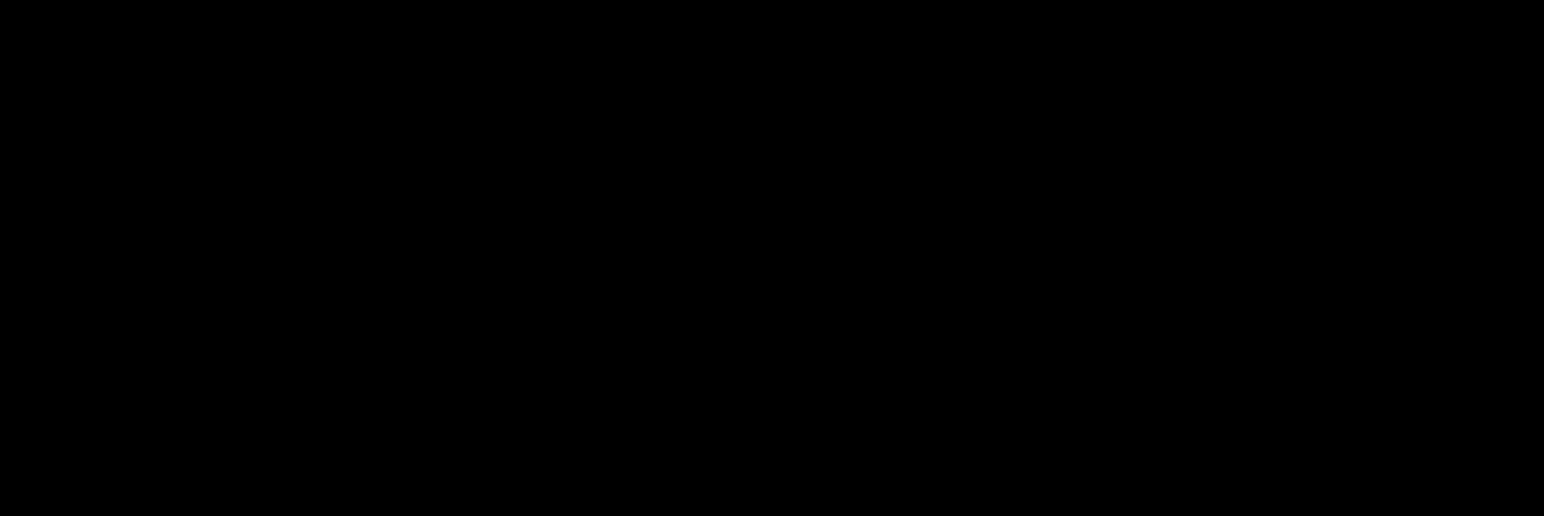

In [ ]:
# 推論の実行
# プロンプトと呼ばれる呪文を入力
prompt = "girl, white hair, very long hair, adult, cute, beautiful, bigl breasts, upper body, lightly dressed, sweat"

images = pipe(prompt,                  # 呪文
              num_images_per_prompt=3, # 1度に生成する枚数
              num_inference_steps=30   # 画像の綺麗さ(初期値50)
              ).images

# 生成された３つの画像を並べて表示する
grid = make_grid([functional.pil_to_tensor(img) for img in images], nrow=3)
ToPILImage()(grid)

## 生成した画像の保存
良さそうな画像が生成されたら保存しましょう．  
ウインドウの左側にあるフォルダーマークをクリックすると1.png,2.png,3.pngがあります．  
右クリックで表示される『ダウンロード』から，各自のPCにダウンロードすることができます．

In [ ]:
images[0].save("09.png")
images[1].save("10.png")
images[2].save("11.png")

# 課題
以下の手順で進めます．

1. まず，どのような画像を生成させたいのかを決めます．  
2. 次にその生成させたい画像を説明するテキストやキーワードをプロンプト部分に記述します．  
3. 画像を何度か生成してみます．  
4. キーワードの追加や変更などを繰り返し，最初に決めた画像に近いものを生成してみてください．

満足できる画像が生成されたら次のセルの問いに回答してください．

## 課題の回答

**どのような画像を生成させたかったのか？**  
回答：




---
**画像を生成するのに使った呪文**  
回答：





---
**最終的に生成した画像についての感想**  
回答：





---



